In [1]:
from datetime import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns

%matplotlib inline

# GAFAMの株価を可視化する

In [2]:
tech_list = ['AMZN', 'AAPL', 'FB', 'GOOG', 'MSFT']

In [3]:
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_tiingo(stock, start=start, end=end, api_key=os.getenv('TIINGO_API_KEY'))

In [5]:
df_list = [AMZN, AAPL, FB, GOOG, MSFT]

In [6]:
for t in df_list:
    t['change'] = t['adjClose'] / t.iloc[0]['adjClose']

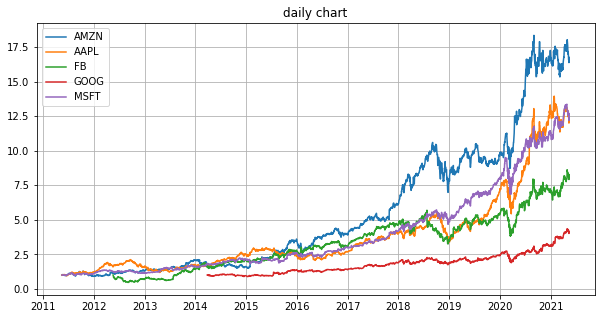

In [7]:
plt.figure(figsize=(10, 5))
for df, t in zip(df_list, tech_list):
    plt.plot(df.loc[t]['change'])
plt.legend(tech_list)
plt.title('daily chart')
plt.grid(True)

# 米国債金利の分析

In [8]:
rate_list = ['DTB3','DGS1', 'DGS5', 'DGS10', 'DGS30']

In [24]:
end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

In [9]:
df_rate = pdr.data.DataReader(rate_list, 'fred', start, end)

In [10]:
df_rate = df_rate.dropna()

In [11]:
df_rate_quarter = df_rate.asfreq('BQ', method='pad')

In [12]:
xdata = np.arange(len(df_rate_quarter), dtype='float')
ydata = np.arange(len(df_rate_quarter.columns), dtype='float')
X,Y = np.meshgrid(xdata,ydata)
Z = np.array(df_rate_quarter, dtype='float')

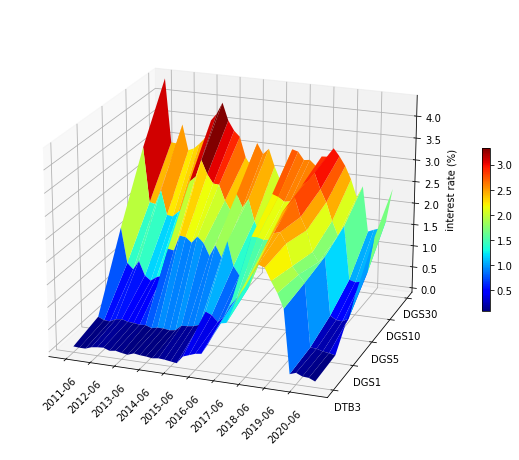

In [20]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z.T, cmap="jet", alpha=1)
fig.colorbar(surf, shrink=0.3)
ax.view_init(elev=20, azim=-70)
fig.patch.set_alpha(1)

frequency = 4
ax.set_xticks(xdata[::frequency])
ax.set_xticklabels(df_rate_quarter.index[::frequency].strftime('%Y-%m'), rotation=45)

ax.set_yticks(ydata)
ax.set_yticklabels(rate_list)

ax.set_zlabel('interest rate (%)')

plt.savefig('yieldcurve.png', facecolor='white')
plt.show()

In [22]:
df_rate['difference'] = df_rate['DGS10'] - df_rate['DTB3']

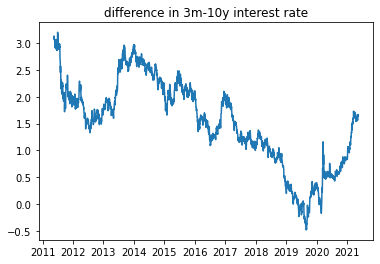

In [23]:
fig = plt.figure()
fig.patch.set_alpha(1)
ax = fig.add_subplot(111)
ax.plot(df_rate['difference'])
ax.set_title('difference in 3m-10y interest rate')
plt.savefig('difference in 3m-10y interest rate')

# 金利とS&P500の分析

In [28]:
end = datetime.now()
start = datetime(end.year - 30, end.month, end.day)

In [29]:
symbols = ['DTB3','DGS1', 'DGS5', 'DGS10', 'DGS30', 'SP500']

In [30]:
df = pdr.data.DataReader(symbols, 'fred')

In [32]:
df = df.dropna()

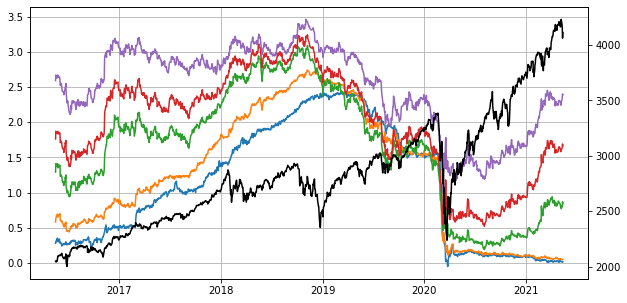

In [74]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot(df[symbols[:-1]])
ax2.plot(df[symbols[-1]], c='black')
ax1.grid(True)